<a href="https://colab.research.google.com/github/kanika0216/python-Basics/blob/main/KNN_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                     **Theoretical**

1. What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a simple, instance-based machine learning algorithm used for classification and regression. It works by storing all available cases and classifying a new case based on a majority vote (for classification) or average (for regression) of its K nearest neighbors in the feature space, determined using a distance metric like Euclidean distance.

2. What is the difference between KNN Classification and KNN Regression?

KNN Classification predicts the class label by majority vote among the K nearest neighbors.

KNN Regression predicts a continuous value by averaging the values of the K nearest neighbors.

3. What is the role of the distance metric in KNN?

The distance metric determines how the "closeness" of instances is measured. Common metrics include Euclidean, Manhattan, and Minkowski distances. The accuracy of KNN heavily depends on the choice of an appropriate distance metric for the given data.

4. What is the Curse of Dimensionality in KNN?

The Curse of Dimensionality refers to the phenomenon where the distance between points becomes less meaningful in high-dimensional spaces. In KNN, this can degrade performance because all points may appear similarly distant, making it difficult to identify true neighbors.

5. How can we choose the best value of K in KNN?

The optimal K can be selected using techniques like:

Cross-validation

Grid search Generally, a small K can lead to overfitting, while a large K can cause underfitting. A good starting point is the square root of the number of data points.

6. What are KD Tree and Ball Tree in KNN?

Both are data structures used to speed up the search for nearest neighbors:

KD Tree: Efficient for low-dimensional data; splits data along dimensions.

Ball Tree: Groups data into hyperspheres; better for higher-dimensional data.

7. When should you use KD Tree vs. Ball Tree?

Use KD Tree when the number of features (dimensions) is relatively low (usually < 20).

Use Ball Tree for higher-dimensional datasets, as it handles the Curse of Dimensionality better.

8. What are the disadvantages of KNN?

Computationally expensive during prediction (slow with large datasets)

Sensitive to irrelevant features and feature scaling

Poor performance in high-dimensional spaces

Doesn’t handle missing data naturally

9. How does feature scaling affect KNN?

KNN is distance-based, so features with larger scales dominate the distance calculation. Feature scaling (e.g., Min-Max Scaling or Standardization) ensures that all features contribute equally to the distance measure.

10. What is PCA (Principal Component Analysis)?

PCA is a dimensionality reduction technique that transforms features into a new set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data.

11. How does PCA work?

PCA works by:

Centering the data.

Computing the covariance matrix.

Finding the eigenvectors (principal components) and eigenvalues (variance explained).

Projecting the data onto the top k principal components.

12. What is the geometric intuition behind PCA?

Geometrically, PCA rotates the coordinate system to align it with the directions of maximum variance in the data. The first principal component points in the direction of highest variance; each successive component is orthogonal to the previous ones.

13. What is the difference between Feature Selection and Feature Extraction?

Feature Selection: Selects a subset of existing features.

Feature Extraction: Creates new features from the existing ones (e.g., PCA combines features into components).

14. What are Eigenvalues and Eigenvectors in PCA?

Eigenvectors determine the direction of the new feature space (principal components).

Eigenvalues determine the magnitude of variance in each direction. Higher eigenvalues mean more information retained.

15. How do you decide the number of components to keep in PCA?

You can decide based on:

Explained variance: Keep components that explain a desired percentage (e.g., 95%) of the variance.

Scree plot: Look for the "elbow" point where the marginal gain drops significantly.

16. Can PCA be used for classification?

Yes, PCA can be used before classification to reduce dimensionality and noise, helping classifiers like KNN, SVM, etc., perform better. However, PCA itself is not a classifier.

17. What are the limitations of PCA?

Assumes linear relationships.

Sensitive to scaling and outliers.

Can be hard to interpret principal components.

Not always optimal for classification, as it doesn't consider class labels.

18. How do KNN and PCA complement each other?

PCA can reduce dimensionality, mitigating the Curse of Dimensionality for KNN. By using PCA first, KNN becomes more efficient and accurate in high-dimensional spaces.

19. How does KNN handle missing values in a dataset?

KNN does not handle missing values inherently. Preprocessing is required, such as:

Imputation (mean, median, KNN imputation)

Removing rows/columns with missing values

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?


Feature	PCA	LDA
Type	Unsupervised	Supervised
Goal	Maximize variance	Maximize class separability
Label Use	No	Yes
Basis	Eigen decomposition of covariance matrix	Eigen decomposition of scatter matrices


                                                   **Practical**

21. Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 153.86212950526712


23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy ?

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and split the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare distance metrics
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{metric.capitalize()} Distance Accuracy: {acc:.4f}")


Euclidean Distance Accuracy: 1.0000
Manhattan Distance Accuracy: 1.0000


24. Train a KNN Classifier with different values of K and visualize decision boundaries

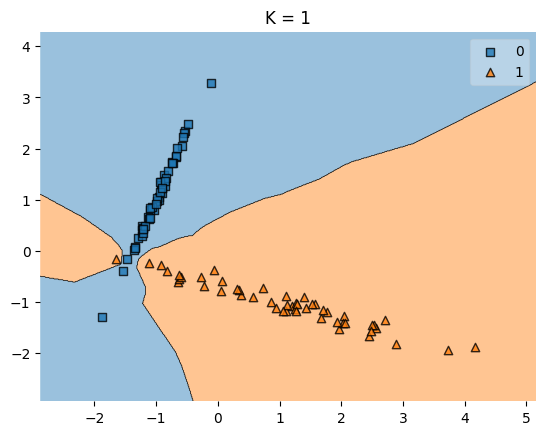

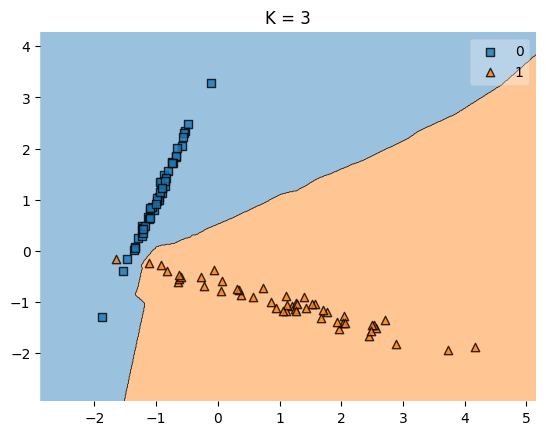

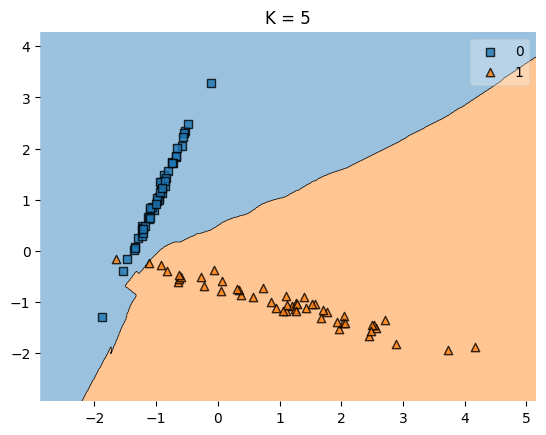

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
for k in [1, 3, 5]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    plt.figure()
    plot_decision_regions(X, y, clf=clf)
    plt.title(f"K = {k}")
    plt.show()


25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [8]:
from sklearn.preprocessing import StandardScaler

# Unscaled
model_unscaled = KNeighborsClassifier()
model_unscaled.fit(X_train, y_train)
print("Unscaled Accuracy:", accuracy_score(y_test, model_unscaled.predict(X_test)))

# Scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, model_scaled.predict(X_test_scaled)))


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


26. Train a PCA model on synthetic data and print the explained variance ratio

In [9]:
from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=100, n_features=5, random_state=42)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [5.94674217e-01 2.54799657e-01 1.50526126e-01 1.25227371e-16
 0.00000000e+00]


27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA



In [10]:
# Without PCA
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print("Accuracy without PCA:", model.score(X_test_scaled, y_test))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = KNeighborsClassifier()
model_pca.fit(X_train_pca, y_train)
print("Accuracy with PCA:", model_pca.score(X_test_pca, y_test))


Accuracy without PCA: 1.0
Accuracy with PCA: 0.9333333333333333


28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'n_neighbors': 3}
Best accuracy: 0.95


29. Train a KNN Classifier and check the number of misclassified samples

In [12]:
y_pred = model.predict(X_test)
print("Misclassified samples:", (y_test != y_pred).sum())


Misclassified samples: 19


30. Train a PCA model and visualize the cumulative explained variance

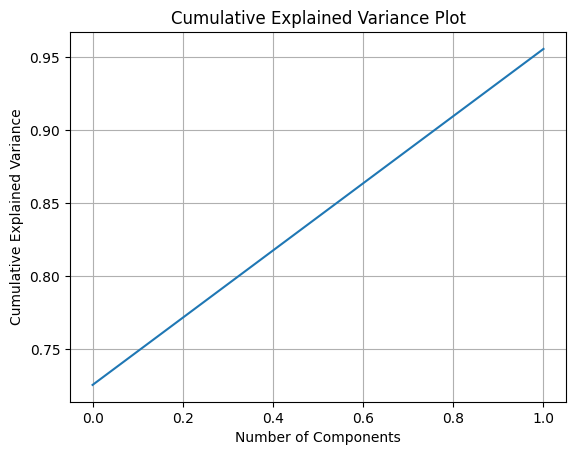

In [13]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


31. Train a KNN Classifier using different values of the weights parameter and compare accuracy

In [14]:
for weight in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=weight)
    model.fit(X_train_scaled, y_train)
    print(f"Weights = {weight}, Accuracy = {model.score(X_test_scaled, y_test)}")


Weights = uniform, Accuracy = 1.0
Weights = distance, Accuracy = 1.0


32. Train a KNN Regressor and analyze the effect of different K values on performance

In [15]:
for k in range(1, 11):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    print(f"K = {k}, MSE = {mean_squared_error(y_test, reg.predict(X_test))}")


K = 1, MSE = 0.0
K = 2, MSE = 0.0
K = 3, MSE = 0.007407407407407404
K = 4, MSE = 0.00625
K = 5, MSE = 0.007999999999999997
K = 6, MSE = 0.014814814814814814
K = 7, MSE = 0.016326530612244896
K = 8, MSE = 0.0171875
K = 9, MSE = 0.015226337448559672
K = 10, MSE = 0.01333333333333333


33. Implement KNN Imputation for handling missing values in a dataset

In [20]:
from sklearn.impute import KNNImputer
import numpy as np

X_with_nan = X.copy()
X_with_nan[::10] = np.nan  # artificially add NaNs
imputer = KNNImputer(n_neighbors=3)
X_filled = imputer.fit_transform(X_with_nan)


34. Train a PCA model and visualize the data projection onto the first two principal components

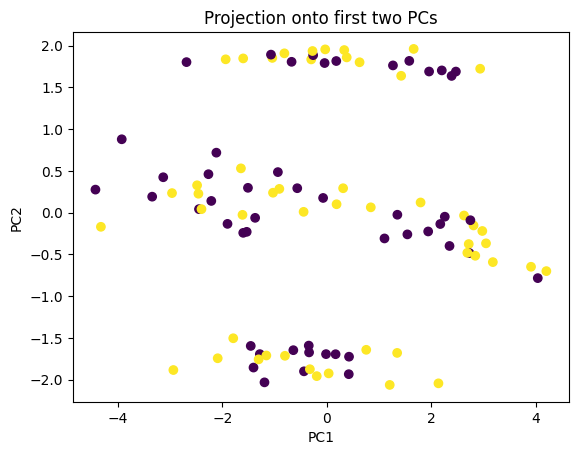

In [21]:
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection onto first two PCs")
plt.show()


35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [22]:
for algorithm in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algorithm)
    model.fit(X_train_scaled, y_train)
    print(f"{algorithm.title()} Accuracy:", model.score(X_test_scaled, y_test))


Kd_Tree Accuracy: 1.0
Ball_Tree Accuracy: 1.0


36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

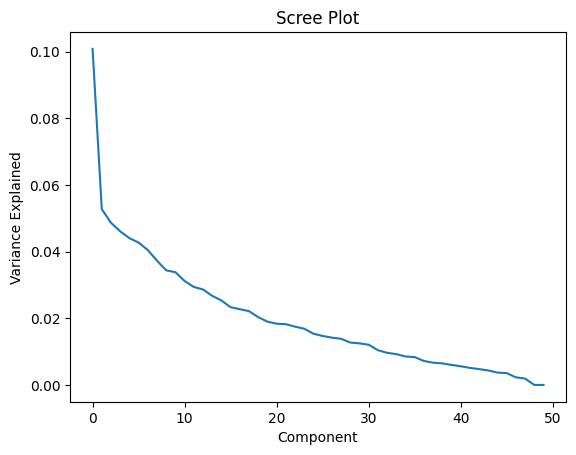

In [23]:
X_hd, _ = make_classification(n_samples=100, n_features=50)
pca_hd = PCA()
pca_hd.fit(X_hd)
plt.plot(pca_hd.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Component")
plt.ylabel("Variance Explained")
plt.show()


37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



38. Train a PCA model and analyze the effect of different numbers of components on accuracy



Components: 1, Accuracy: 0.9000
Components: 2, Accuracy: 0.9333
Components: 3, Accuracy: 1.0000
Components: 4, Accuracy: 1.0000


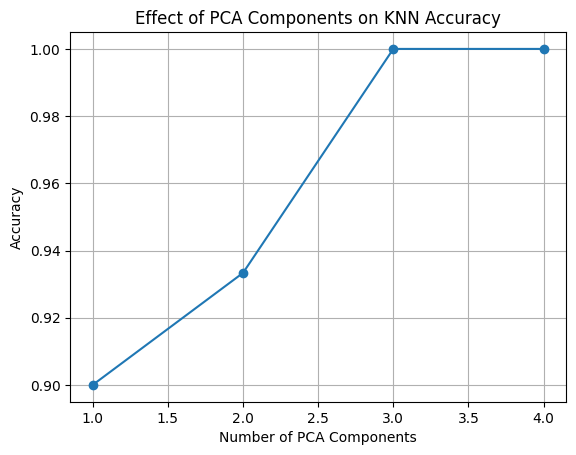

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different numbers of PCA components
components = range(1, X.shape[1] + 1)
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Components: {n}, Accuracy: {acc:.4f}")

# Plotting the results
plt.plot(components, accuracies, marker='o')
plt.title("Effect of PCA Components on KNN Accuracy")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()




39. Train a KNN Classifier with different leaf_size values and compare accuracy

In [28]:
for leaf in [10, 30, 50]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train_scaled, y_train)
    print(f"Leaf Size = {leaf}, Accuracy = {model.score(X_test_scaled, y_test)}")


Leaf Size = 10, Accuracy = 1.0
Leaf Size = 30, Accuracy = 1.0
Leaf Size = 50, Accuracy = 1.0


40. Train a PCA model and visualize how data points are transformed before and after PCA

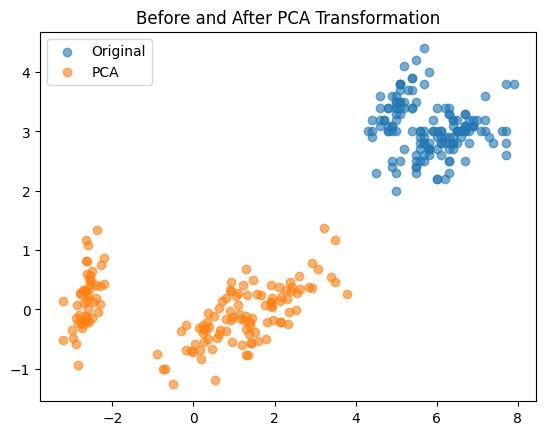

In [29]:
X_transformed = pca.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, label='Original')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6, label='PCA')
plt.legend()
plt.title("Before and After PCA Transformation")
plt.show()


41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [30]:
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.87      0.72      0.79        18
           2       0.53      0.80      0.64        10

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.77        45
weighted avg       0.82      0.78      0.79        45



42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error



In [31]:
for metric in ['euclidean', 'manhattan']:
    reg = KNeighborsRegressor(metric=metric)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"Metric: {metric}, MSE: {mean_squared_error(y_test, y_pred)}")


Metric: euclidean, MSE: 0.2604444444444444
Metric: manhattan, MSE: 0.23022222222222222


43. Train a KNN Classifier and evaluate using ROC-AUC score

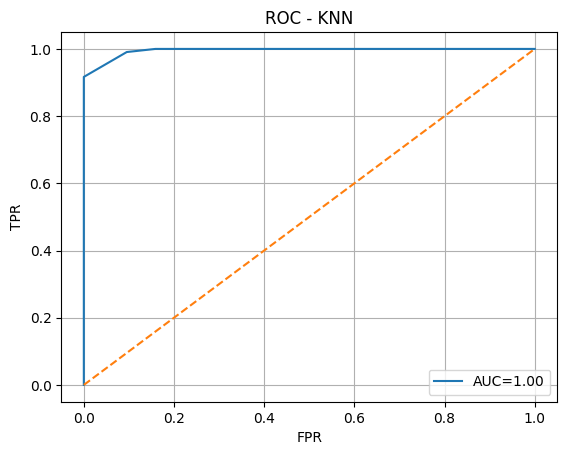

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}"); plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - KNN"); plt.legend(); plt.grid()
plt.show()



44. Train a PCA model and visualize the variance captured by each principal component

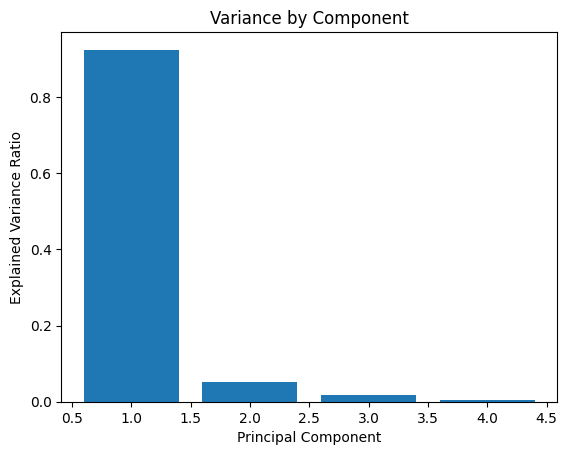

In [34]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance by Component")
plt.show()


45. Train a KNN Classifier and perform feature selection before training

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = KNeighborsClassifier()
model.fit(X_train_fs, y_train)
print("Accuracy after feature selection:", model.score(X_test_fs, y_test))


Accuracy after feature selection: 0.9122807017543859


46. Train a PCA model and visualize the data reconstruction error after reducing dimensions

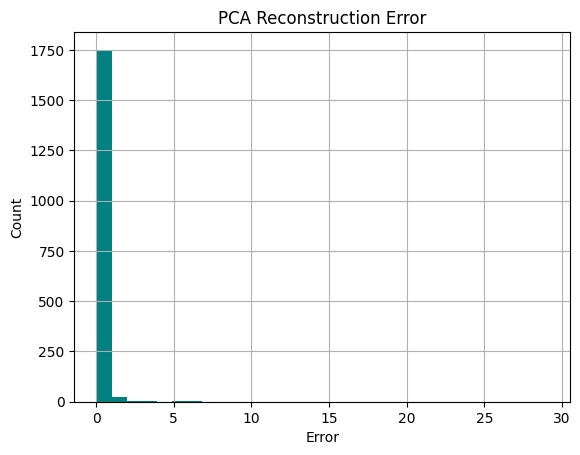

In [37]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X = StandardScaler().fit_transform(load_digits().data)
X_rec = PCA(n_components=10).fit_transform(X)
X_inv = PCA(n_components=10).fit(X).inverse_transform(X_rec)
err = np.mean((X - X_inv)**2, axis=1)

plt.hist(err, bins=30, color='teal'); plt.title("PCA Reconstruction Error")
plt.xlabel("Error"); plt.ylabel("Count"); plt.grid(); plt.show()



47.Train a KNN Classifier and visualize the decision boundary.

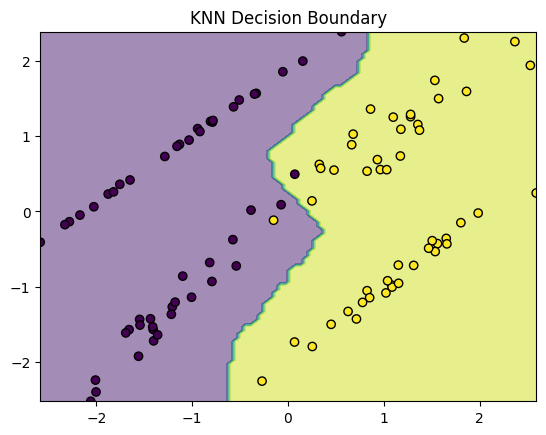

In [39]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, random_state=42)
model = KNeighborsClassifier(n_neighbors=5).fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("KNN Decision Boundary")
plt.show()


48. Train a PCA model and analyze the effect of different numbers of components on data variance.

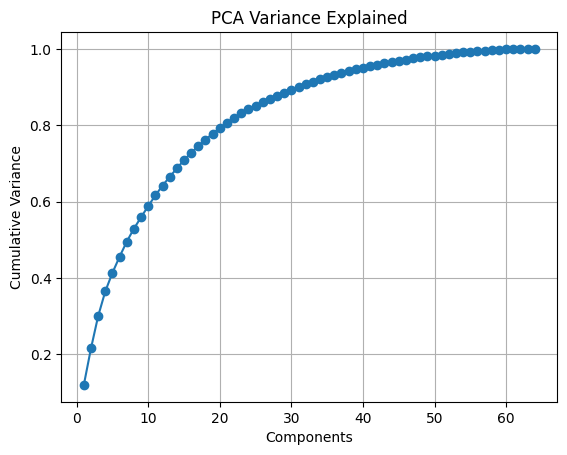

In [40]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_digits().data)
pca = PCA().fit(X)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Components"); plt.ylabel("Cumulative Variance"); plt.title("PCA Variance Explained")
plt.grid(True); plt.show()
